In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
import time
import torch 
from torch import nn


In [21]:
scaler=StandardScaler()

In [22]:
data=pd.read_csv('/home/jabed/Downloads/Desktop_backup/Desk1/Logistic Regression/Titanic/train_and_test2.csv')
data.dropna(inplace=True)
#X=np.column_stack((data['Age'],data['Sex'],data['Pclass']))
X=data.drop(columns=['2urvived']).values
y=data['2urvived'].values
y=y.reshape((y.shape[0],1))


X_scaled=scaler.fit_transform(X)
X_scaled.shape

(1307, 27)

In [23]:
X_torch=torch.tensor(X_scaled,dtype=torch.float32)
y_torch=torch.tensor(y,dtype=torch.float32)

In [24]:
class LogisticModel(nn.Module):
    
    def __init__(self, in_size,units=1):
        super(LogisticModel,self).__init__()
        # hidden layer
        self.linear= nn.Linear(in_size, units)
        self.sigmoid=nn.Sigmoid()
        self.loss=nn.MSELoss()

    def __call__(self,xb):
        self.x=xb 
        l1=self.linear(self.x)
        out=self.sigmoid(l1)
        return out    
        
   
    def training_step(self,x_train,y_true):
        y_pred=self(x_train)
        loss_value=self.loss(y_pred,y_true)
        
        return y_pred,loss_value
    def accuracy(self,y_pred,y_true):
        acc=accuracy_score(y_pred.reshape(-1).detach().numpy().round(),y_torch.detach().numpy())
        return acc 
           
    def epoch_end(self, epoch, train_loss,acc):
        print("Epoch [{}], _loss: {:.4f}, and accuracy is {:.4f} ".format(epoch, train_loss,acc))
    
            
       

  


In [25]:
model=LogisticModel(X_scaled.shape[1])
optimizer=torch.optim.SGD(model.parameters(),lr=0.05)

In [26]:
def fit(num_epoch):
    j_hist=[]
    start=time.time()
    for epoch in range(num_epoch):
        y_pred,loss_value=model.training_step(X_torch,y_torch)
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()
        acc=model.accuracy(y_pred,y_torch) 
        model.epoch_end(epoch+1,loss_value,acc)
        j_hist.append((loss_value.item(),acc))
    end=time.time()
    print('total time is =',end-start)    
    return j_hist

    

    

In [27]:
j_history=fit(100)

Epoch [1], _loss: 0.2689, and accuracy is 0.4713 
Epoch [2], _loss: 0.2671, and accuracy is 0.4820 
Epoch [3], _loss: 0.2653, and accuracy is 0.4943 
Epoch [4], _loss: 0.2635, and accuracy is 0.5034 
Epoch [5], _loss: 0.2618, and accuracy is 0.5134 
Epoch [6], _loss: 0.2600, and accuracy is 0.5264 
Epoch [7], _loss: 0.2583, and accuracy is 0.5333 
Epoch [8], _loss: 0.2566, and accuracy is 0.5455 
Epoch [9], _loss: 0.2549, and accuracy is 0.5562 
Epoch [10], _loss: 0.2533, and accuracy is 0.5669 
Epoch [11], _loss: 0.2517, and accuracy is 0.5807 
Epoch [12], _loss: 0.2500, and accuracy is 0.5968 
Epoch [13], _loss: 0.2485, and accuracy is 0.6090 
Epoch [14], _loss: 0.2469, and accuracy is 0.6236 
Epoch [15], _loss: 0.2453, and accuracy is 0.6412 
Epoch [16], _loss: 0.2438, and accuracy is 0.6511 
Epoch [17], _loss: 0.2423, and accuracy is 0.6634 
Epoch [18], _loss: 0.2408, and accuracy is 0.6687 
Epoch [19], _loss: 0.2394, and accuracy is 0.6756 
Epoch [20], _loss: 0.2379, and accuracy 

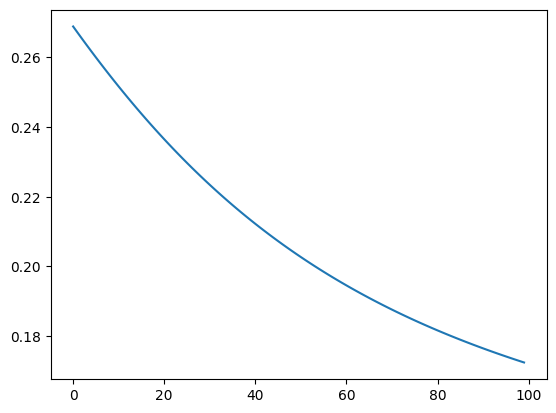

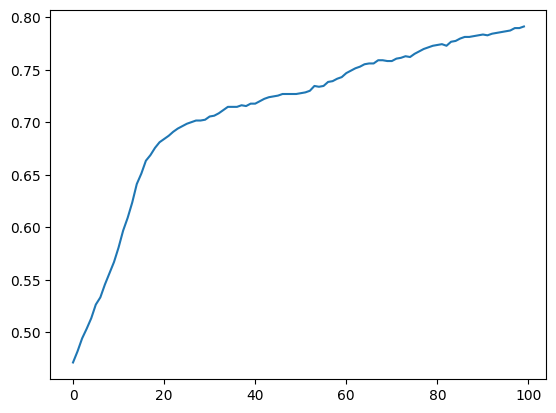

In [28]:
plt.plot(np.array(j_history)[:,0])
plt.show()
plt.plot(np.array(j_history)[:,1])
